In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from fpdf import FPDF
import plotly_express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error as mae
from sklearn import linear_model

In [2]:
df = pd.read_csv('/Users/jdickinson/Documents/PersonalRepos/cwu-fitlab/data/final/fitlab_data.csv', index_col=0)

# Insights

1.  Number of people who came this quarter
2.  Highest Vo2max (m/f)
3. Absolute difference between skin fold and gold standard
4. Lowestv bf% (m/f)
5. concordance plot between calipers and bod pod/hydro
6. Max push ups
7. All distributions?

# Agg stats

In [89]:
# Num visits since running
len(df)

33

In [143]:
sorted_df = df.sort_values(by=['Visit Date'])

In [148]:
sorted_df['Count'] = range(1, len(df)+1)

In [150]:
male_df = df[df['Sex'] == 'M']
sorted_m_df = male_df.sort_values(by=['Visit Date'])
sorted_m_df['Count'] = range(1, len(sorted_m_df)+1)

In [151]:
fem_df = df[df['Sex'] == 'F']
sorted_f_df = fem_df.sort_values(by=['Visit Date'])
sorted_f_df['Count'] = range(1, len(sorted_f_df)+1)

In [185]:
# error col
df['Absolute Error'] = abs(df['Bodyfat (Calipers)'] - df['Body Fat (%)'])
df['Error'] = df['Bodyfat (Calipers)'] - df['Body Fat (%)']

In [ ]:
# Total MAE
actual = df['Body Fat (%)'].drop(11)
calc = df['Bodyfat (Calipers)'].drop(11)

error = mae(actual, calc)

print(error)

In [176]:
# Bodpod vs hydro
bodpod = df[df['Alternate Method'] == 'Bod pod']
hydro = df[df['Alternate Method'] == 'Hydrostatic']

actual_bp = bodpod['Body Fat (%)'].drop(11)
calc_bp = bodpod['Bodyfat (Calipers)'].drop(11)

actual_hydro = hydro['Body Fat (%)']
calc_hydro = hydro['Bodyfat (Calipers)']

error_bp = mae(actual_bp, calc_bp)
error_hydro = mae(actual_hydro, calc_hydro)

print(f'Bod pod mae {error_bp}')
print(f'Hydro mae {error_hydro}')

Bod pod mae 5.140000000000001
Hydro mae 5.216470588235295


In [214]:
visit_dates = df.groupby(['Visit Date']).mean()

/var/folders/0r/_6trl51948x_vd90czsk02t40000gq/T/ipykernel_32346/1711156510.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [215]:
per_week_df = df.groupby(pd.Grouper(key='Visit Date', freq='W')).mean()

/var/folders/0r/_6trl51948x_vd90czsk02t40000gq/T/ipykernel_32346/1711156510.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [205]:
fig = px.bar(visit_dates, x=visit_dates.index, y=visit_dates['Error'],
             range_y=[-10, 10], template='ggplot2')

fig.add_hrect(y0=-3.5, y1=3.5, line_width=0, fillcolor="green", opacity=0.2, annotation_text="+-3.5 error")

fig.show()

In [216]:
# Per week 
fig = px.bar(per_week_df, x=per_week_df.index, y=per_week_df['Error'],
             range_y=[-10, 10], template='ggplot2')

fig.add_hrect(y0=-3.5, y1=3.5, line_width=0, fillcolor="green", opacity=0.2, annotation_text="+-3.5 error")

fig.show()

# Figs

In [162]:
fig = px.line(sorted_df, x=sorted_df['Visit Date'], y=sorted_df['Count'], title='Fitlab visits over time',
              range_x=[sorted_df['Visit Date'].min(), '2023-03-07'])

fig.add_trace(go.Scatter(x=sorted_m_df['Visit Date'], y=sorted_m_df["Count"],
                    mode='lines',
                    name='Male Vists'))

fig.add_trace(go.Scatter(x=sorted_f_df['Visit Date'], y=sorted_f_df["Count"],
                    mode='lines',
                    name='Female Vists'))

fig.show()

In [3]:
def box_plot(df, x: str, y: str, save: bool):

    box_pal = {"F": "#FF5050", "M": '#D1D1D1'}
    strip_pal = {"F": '#000000', "M": "#FF5050"}

    sns.set_style("ticks")
    ax = sns.boxplot(data=df, x=x, y=y, palette=box_pal)
    sns.stripplot(data=df, x=x, y=y, ax=ax, palette=strip_pal)

    if save:
        plt.savefig(f'./reports/figs/{x}{y[0:3]}.png')
    return

In [4]:
def bar_plot(df, x: str, y: str, save: bool):

    plt.bar(x, y, edgecolor='#000000')
    plt.xticks(df[x])
    
    if save:
        plt.savefig(f'./reports/figs/{x}_count.png')
    return

In [5]:
def bar_plot(df, x: str, save: bool):

    # pallete
    bar_pal = {"F": "#FF5050", "M": '#D1D1D1'}

    # fig
    fig, ax = plt.subplots()
    sns.set_style("ticks")
    ax = sns.barplot(data=df, x=x, palette=bar_pal)
    plt.setp(ax.patches, linewidth=5)
    
    if save:
        plt.savefig(f'./reports/figs/{x}_count.png')
    return

In [6]:
dates = list(df['Visit Date'])

date_object = datetime.strptime(dates[0], '%Y-%m-%d').date()

In [7]:
df['Visit Date'] = pd.to_datetime(df['Visit Date'], format='%Y-%m-%d')

In [9]:
visit_mean_df = df.groupby(['Visit Date']).mean()

/var/folders/0r/_6trl51948x_vd90czsk02t40000gq/T/ipykernel_32346/191839741.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  visit_mean_df = df.groupby(['Visit Date']).mean()


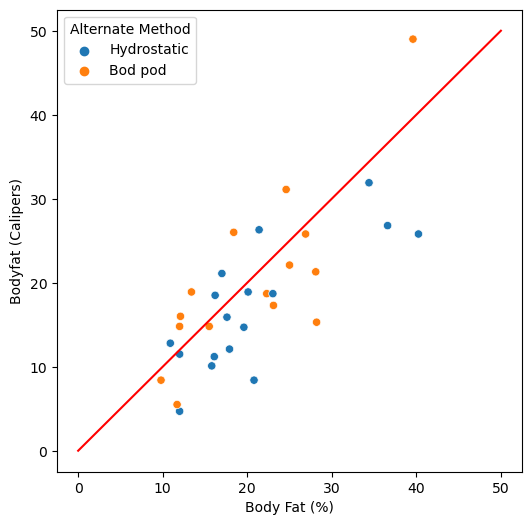

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=df, x=df['Body Fat (%)'], y=df['Bodyfat (Calipers)'], hue=df['Alternate Method'])
X_plot = np.linspace(0, 50, 50)
Y_plot = np.linspace(0, 50, 50)

plt.plot(X_plot, Y_plot, color='r')

In [35]:
fig = px.scatter(df, x='Body Fat (%)', y="Bodyfat (Calipers)", color="Alternate Method", 
                 hover_data=['Age'], width=850, height=600
                 )
fig.update_layout(
    shapes = [{'type': 'line', 'yref': 'paper', 'xref': 'paper', 'y0': 0, 'y1': 1, 'x0': 0, 'x1': 1, 'layer': 'below'}],
    margin=dict(l=20, r=20, t=20, b=20),
    yaxis_range=[0,50],
    xaxis_range=[0,50]
    )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [34]:
actual = df['Body Fat (%)'].drop(11)
calc = df['Bodyfat (Calipers)'].drop(11)

error = mae(actual, calc)

print(error)

5.180625000000001


In [45]:
fig = px.box(df, x='Sex', y="Body Fat (%)", color='Sex',
             hover_data=['Age'], width=850, height=600
                 )

fig.update_layout(yaxis_range=[0,50])


fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [44]:
fig = px.box(df, x='Sex', y='VO2Max (ml/kg/min)', color='Sex',
             hover_data=['Age'], width=850, height=600
                 )

fig.update_layout(yaxis_range=[0,80])

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [47]:
fig = px.box(df, x='Sex', y='Push Ups', color='Sex',
             hover_data=['Age'], width=850, height=600
                 )

fig.update_layout(yaxis_range=[0,60])

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [49]:
fig = px.box(df, x='Sex', y='Sit and Reach (cm)', color='Sex',
             hover_data=['Age'], width=850, height=600
                 )

fig.update_layout(yaxis_range=[0,50])

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [54]:
fig = px.box(df, x='Sex', y='Resting Heart Rate (BPM)', color='Sex',
             hover_data=['Age'], width=850, height=600
                 )

fig.update_layout(yaxis_range=[40,110])

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [67]:
fig = px.scatter(df, x='Resting Heart Rate (BPM)', y="VO2Max (ml/kg/min)", color='Sex',
                 hover_data=['Age'], width=850, height=600, trendline='ols',
                 trendline_scope="overall", trendline_color_override="black"
                 )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     8.713
Date:                Fri, 10 Mar 2023   Prob (F-statistic):            0.00696
Time:                        16:01:54   Log-Likelihood:                -93.920
No. Observations:                  26   AIC:                             191.8
Df Residuals:                      24   BIC:                             194.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.3691     14.696      6.013      0.000      58.038     118.700
x1            -0.6049      0.205     -2.952      0.007      -1.028      -0.182
==============================================================================
Omnibus:                        2.660   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                1.293
Skew:                           0.461   Prob(JB):                        0.524
Kurtosis:                       3.584   Cond. No.                         576.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
fig = px.scatter(df, x='Body Fat (%)', y="VO2Max (ml/kg/min)", color='Sex',
                 hover_data=['Age'], width=850, height=600, trendline='ols',
                 trendline_scope="overall", trendline_color_override="black"
                 )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     13.23
Date:                Fri, 10 Mar 2023   Prob (F-statistic):            0.00131
Time:                        16:04:38   Log-Likelihood:                -92.238
No. Observations:                  26   AIC:                             188.5
Df Residuals:                      24   BIC:                             191.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.1524      4.933     12.599      0.000      51.971      72.334
x1            -0.8114      0.223     -3.638      0.001      -1.272      -0.351
==============================================================================
Omnibus:                        4.842   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                3.192
Skew:                           0.818   Prob(JB):                        0.203
Kurtosis:                       3.518   Cond. No.                         63.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
temp = df.dropna()
X = temp[['Body Fat (%)', 'Resting Heart Rate (BPM)']]
y = temp['VO2Max (ml/kg/min)']

In [85]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [86]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 96.55548478680109
Coefficients: 
 [-0.75351379 -0.50425302]
Score: 
 0.5226208593873033
